# PROJECT PART 2 - TIME SERIES

Professor: Patrick Waelbroeck

Students:

- Gabriel de Souza Oliva
- Isabella de Melo Sousa

Date: 22/11/2020

This contains both the code and the text answers to the questions of the project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations manquantes)

In [ ]:
import os
root = os.path.abspath(os.curdir)
file = root + '/quarterly.xls'
data = pd.read_excel (file) 
columns = ['DATE', 'FFR', 'Tbill', 'Tb1yr', 'r5', 'r10', 'PPINSA', 'Finished', 'CPI','CPICORE','M1NSA','M2SA','M2NSA','Unemp',
          'IndProd','RGDP','Potent','Deflator','Curr']
df = pd.DataFrame(data, columns=columns)

# Supprimer toutes les lignes avec des valeurs manquantes
df = df.dropna()
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


### 2. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez

inf:
0      0.000000
1      0.578231
2      0.067636
3      0.642109
4      0.201478
         ...   
207    0.349279
208    0.572763
209    0.249704
210    0.520014
211    0.543407
Name: CPI, Length: 212, dtype: float64


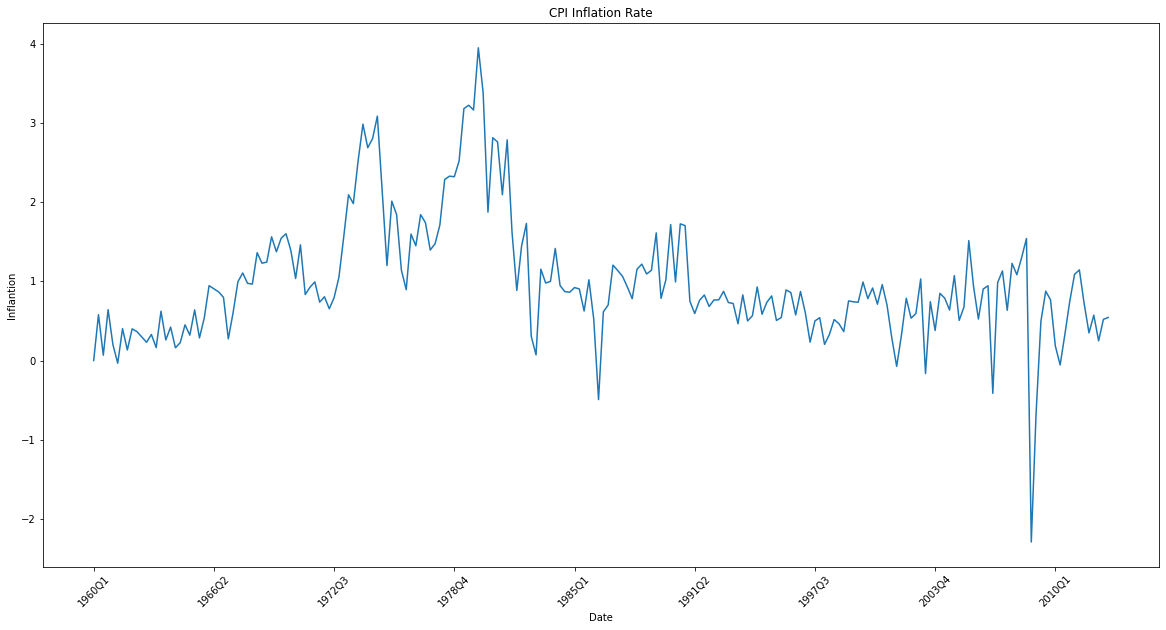

In [ ]:
# to calculate inflation we need to:
# subtract the starting date CPI from the later date CPI and divide your answer by the starting date CPI.
# multiply the results by 100 to get inflation rate as a percentage.

import matplotlib.ticker as mticker
inf = df.CPI.pct_change()*100

inf = inf.fillna(0)

print('inf:')
print(inf)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot_date(df.DATE, inf, marker='', linestyle='-')

myLocator = mticker.MultipleLocator(25)
ax.xaxis.set_major_locator(myLocator)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Inflantion')
plt.title('CPI Inflation Rate')
plt.show()

In the graphic above it is possible to see the variation of inflation through the years. Until 1980, the graphic depicts an increase in inflation and after that a decrease in the curve.

### 3. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la différence entre ces deux graphiques ?

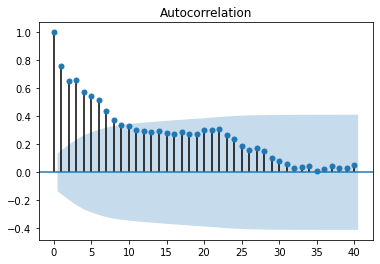

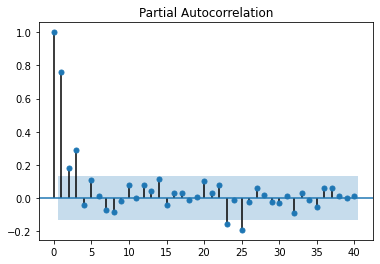

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

x = plot_acf(inf, lags=40, fft=False, alpha = 0.05)
x = plot_pacf(inf, lags=40, alpha = 0.05)

Autocorrelation is the linear dependence of a variable with itself at two points in time. For stationary processes, autocorrelation between any two observations depends only on the time lag k between them: autocorrelation of lag k is the correlation between $y_t$ and $y_{t+k}$ where the time series is $\{y_t\}$.

Partial autocorrelation is the autocorrelation between $y_t$ and $y_{t-k}$ after the removal of any linear dependence on $y_1, y_2, ..., y_{t-k+1}$.

### 4. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces deux conditions. Expliquez le terme "spurious regression".

Stationarity refers to the distributions of the random variables, ergodicity, on the other hand, doesn't look at statistical properties of the random variables but at the sample paths, i.e. what you observe physically.

Definitions based on slides "Cours 5" from the course:  

- Stationarity stochastic process {X(t)} is said to be strictly stationary if its distribution is time-invariant, i.e., the joint distribution function of (X(t1), ..., X(tn)) is identical to that of (X(t1+l), ..., X(tn+l)) for all l and n.

- Ergodicity = the process forgets the conditions initials: the auto-correlation of order k tends to 0 when k tends to infinity.

Stationarity is an important property of signals because a lot of data can be considered stationary and ergodicity plays a central role in estimations of the statistical quantities, where it ensures that time series estimates serves as unbiased estimators of the considered statistical parameters. Ergodicity is necessary to apply law of large numbers and central limit theorem.

Finally, a spurious regression is one in which the time-series variables are non-stationary and independent.

### 5. Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). We know that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that, for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that and so on.

This way by looking at the Partial Autocorrelation graphic plotted on question 3, we can observe that the model is AR(3).

Now, we are going to calculate the coefficients. We know that:
A p-order autoregressive process, AR(p), takes the form: $y_i = \phi_0 + \phi_1y_{i-1} + \phi_2y_{i-2} + ...+ \phi_py_{i-p} + \epsilon_i$. Therefore AR(3) takes the form: $y_i = \phi_0 + \phi_1y_{i-1} + \phi_2y_{i-2} +  \phi_3y_{i-3} + \epsilon_i$

In [ ]:
import statsmodels.tsa.api as smt
mdl = smt.AR(inf).fit(maxlag=3)
print(mdl.params)
print(mdl.summary())

const     0.142692
L1.CPI    0.578205
L2.CPI   -0.012483
L3.CPI    0.292626
dtype: float64
                               AR Model Results                               
Dep. Variable:                      C  -                  P                  I
Model:                          AR(3)   Log Likelihood                -139.189
Method:                          cmle   S.D. of innovations              0.471
Date:                Sun, 22 Nov 2020   AIC                             -1.458
Time:                        22:41:01   BIC                             -1.378
Sample:                             0   HQIC                            -1.426
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1427      0.057      2.505      0.012       0.031       0.254
L1.CPI         0.5782      0.067      8.

C:\Users\bebel\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


We can observe that the coeficients are $\phi_0$ =  0.142692, $\phi_1$ = 0.578205, $\phi_2$ = -0.012483 and $\phi_3$ = 0.292626.


### 6.Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en fonction du taux d’inflation courant et une constante.


                            OLS Regression Results                            
Dep. Variable:                  Unemp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02604
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.872
Time:                        22:41:01   Log-Likelihood:                -401.84
No. Observations:                 212   AIC:                             807.7
Df Residuals:                     210   BIC:                             814.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0593      0.179     33.774      0.0

Text(0.5, 1.0, 'curve de Philips')

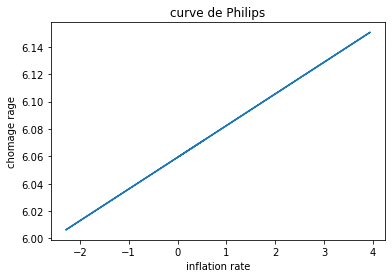

In [ ]:
n = len(inf)

y = df['Unemp']
const = np.ones(n)
X = np.column_stack((const, inf))

model=sm.OLS(y,X)
results = model.fit()
print(results.summary())

plt.plot(inf, results.params[0] +  results.params[1]*inf)
plt.xlabel('inflation rate')
plt.ylabel('chomage rage')
plt.title('curve de Philips')

We can see that the coeficient for the constante is 6.0593 and the coeficient for the inf is 0.0232.

### 7. Tester l’autocorrélation des erreurs.

Testing the autocorrelation of errors by testing the hypothesis:
H0 : ρ = 0 in the equation u(t) = ρu(t − 1) + ν

In [ ]:
u=results.resid
n=len(u)
u_1=u[0:n-1]
const=np.ones(n-1)
X=np.column_stack((const, u_1))
X=X[:,1]
y=u[1:n]
model=sm.OLS(y,X)
results1 = model.fit()
print(results1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4564.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                   1.99e-144
Time:                        22:41:02   Log-Likelihood:                         -70.709
No. Observations:                 211   AIC:                                      143.4
Df Residuals:                     210   BIC:                                      146.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We can observe that the p-value is 0.000, therefore we can reject the hypothesis H0 (that the autocorrelation of errors  is null) at 5%. 

### 8. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

The correction occurs by using the transformation y(t) - ρy(t-1) and $X_k$(t) - ρ$X_k$(t-1).

In [ ]:
n = len(inf)

y = df['Unemp']
y_1 = df['Unemp'].shift(1)

rho = results1.params[0]

u_ch = y - y_1*rho

inf_1 = inf.shift(1)

inf = inf - inf_1*rho

inf=inf.fillna(0)
u_ch=u_ch.fillna(0)

y = u_ch
s = np.shape(y)
const = np.ones(s)*(1-rho)
X = np.column_stack((const, inf))
model=sm.OLS(y,X)
results = model.fit()
u=results.resid
n=len(u)
u_1=u[0:n-1]
const=np.ones(n-1)
X=np.column_stack((const, u_1))
X=X[:,1]
y=u[1:n]
model=sm.OLS(y,X)
results1 = model.fit()

print(results1.summary())
print(results1.params[0])

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.406
Model:                            OLS   Adj. R-squared (uncentered):              0.403
Method:                 Least Squares   F-statistic:                              143.2
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.65e-25
Time:                        22:41:02   Log-Likelihood:                         -11.818
No. Observations:                 211   AIC:                                      25.64
Df Residuals:                     210   BIC:                                      28.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 9. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

In [ ]:
inf = df.CPI.pct_change()*100
inf = inf.fillna(0)

In [ ]:
ch1 = df['Unemp'][:int(len(df['Unemp'])/2)]
ch2 = df['Unemp'][int(len(df['Unemp'])/2):]

inf1 = inf[:int(len(inf)/2)]
inf2 = inf[int(len(inf)/2):]

In [ ]:
y = ch1
s1 = np.shape(y)
const = np.ones(s1)
X = np.column_stack((const, inf1))
model=sm.OLS(y,X)
results = model.fit()
ssr0_ch1 = results.ssr
p1 = results.f_pvalue

y = ch2
s2 = np.shape(y)
const = np.ones(s2)
X = np.column_stack((const, inf2))
model=sm.OLS(y,X)
results = model.fit()
ssr0_ch2 = results.ssr
p2 = results.f_pvalue

ssr0 = ssr0_ch1 + ssr0_ch2

y = df['Unemp']
s = np.shape(y)
const = np.ones(s)
X = np.column_stack((const, inf))
model=sm.OLS(y,X)
results = model.fit()
ssr1 = results.ssr
p3 = results.f_pvalue

In [ ]:
print(p1,p2,p3)

0.36193023177752326 0.07153561587418138 0.8719574649301114


In [ ]:
from scipy.stats import f
s1=s1[0]
s2=s2[0]
k=2
F=(ssr1-ssr0)/ssr0 * (s1+s2 - 2*k)/k
p_value = f.sf(F,k,s1+s2 -2*k)

In [ ]:
p_value

0.13856913986617442

By the tests above, we fail to reject the hypotesis of non significance of inflation over unemployment. In the 3 tests (first middle of the sample, second middle of the sample, whole sample) the p-value was above 0.05

### 10. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

In [ ]:
inf = df.CPI.pct_change()*100
inf = inf.fillna(0)

y = df['Unemp']

n = len(inf)

inf_1 = inf.shift(-1).reset_index(drop=True)
inf_2 = inf.shift(-2).reset_index(drop=True)
inf_3 = inf.shift(-3).reset_index(drop=True)
inf_4 = inf.shift(-4).reset_index(drop=True)

y=y[:-4]
inf_0=inf[:-4]
inf_1=inf_1[:-4]
inf_2=inf_2[:-4]
inf_3=inf_3[:-4]
inf_4=inf_4[:-4]

s = np.shape(y)
const = np.ones(s)
X = np.column_stack((const, inf_0, inf_1, inf_2, inf_3, inf_4))
model=sm.OLS(y,X)
results = model.fit()
print('F: ', results.fvalue)
print('p-value: ', results.f_pvalue)

F:  0.12077382981986592
p-value:  0.9876604433559576


### 11. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de terme de l’inflation sur le chômage.

<BarContainer object of 5 artists>

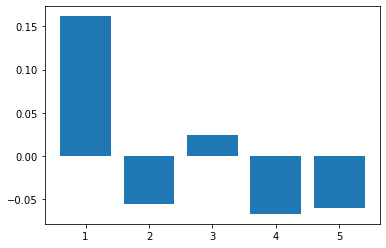

In [ ]:
d_inf=(results.params[1], results.params[2], results.params[3], results.params[4], results.params[5]) 
x=(1,2,3,4,5)
plt.bar(x,d_inf)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Unemp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.1208
Date:                Sun, 22 Nov 2020   Prob (F-statistic):              0.988
Time:                        22:41:02   Log-Likelihood:                -392.81
No. Observations:                 208   AIC:                             797.6
Df Residuals:                     202   BIC:                             817.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0406      0.201     30.055      0.000       5.644       6.437
x1             0.1617      0.238      0.681      0.497      -0.307       0.630
x2            -0.0559      0.277     -0.202      0.840      -0.602       0.490
x3             0.0244      0.266      0.092      0.927      -0.500       0.549
x4            -0.0668      0.278     -0.240      0.810      -0.615       0.481
x5            -0.0598      0.239     -0.250      0.803      -0.532       0.412
==============================================================================
Omnibus:                       16.634   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.651
Skew:                           0.731   Prob(JB):                     8.91e-05
Kurtosis:                       3.123   Cond. No.                         9.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The long run impact of inflaction is defined by the sum of the coefficients, the cumulative effect. 
Therefore:


In [ ]:
lri = results.params.sum()-results.params[0]

In [ ]:
lri

0.0035634439040910237